## Analiza zbioru danych Horse Survival Dataset
### Python w analizie danych
### Joanna Bodora grupa 1
### Źródło danych
Dane pochodzą ze zbiuru dostępnego na stronie Kaggle pod adresem: https://www.kaggle.com/datasets/yasserh/horsesurvivalprognostication 


Baza umożliwia przewidzenie czy zwierze przeżyje na podstawie wcześniejszych schorzeń. 
### Kolumny:
- **surgery** - informacja czy koń został wyleczony bez operacji,
- **age** - wiek konia,
- **hospital_number** - numer id (może nie być unikalny przy kilkukrotnym leczeniu konia),
- **rectal_temp** - temperatura konia w stopniach Celsjusza (prawidłowa 37.8),
- **pulse** - puls zwierzęcia,
- **respiratory_rate** - częstość oddechów,
- **temp_of_extremities** - temperatura kończyn,
- **peripheral_pulse** - puls obwodowy,
- **mucous_membrane** - kolor błony śluzowej,
- **capillary_refill_time** - czas napełniania kapilary, jest to test jak sprawnie działa system krążenia konia,
- **pain** - subiektywna ocena poziomu bólu konia
- **peristalsis** - perystaltyka, aktywność w jelitach,
- **abdominal_distention** - rozdęcie brzucha,
- **nasogastric_tube** - sonda nosowo-żołądkowa,
- **nasogastric_reflux** - refluks nosowo-żołądkowy,
- **nasogastric_reflux_ph** - refluks nosowo-żołądkowy PH,
- **rectal_exam_feces** - badanie per rectum - kał,
- **abdomen** - badanie brzucha,
- **packed_cell_volume** - liczba czerwonych krwinek objętościowo we krwi,
- **total_protein** - białko całkowite,
- **abdomo_appearance** - test płynu po nabiciu igłę brzucha konia,
- **abdomo_protein** - białko całkowite z nakłucia brzucha,
- **outcome** - ostateczna informacja czy zwierzę przeżyło,
- **surgical_lesion** - informacja czy zmiana retrospektywnie była chirurgiczna,
- **lesion_1, lesion_2, lesion_3** - zawiera informacje o miejscu, typie, podtypie oraz specyficznym kodzie zmiany,
- **cp_data** - informacja czy dostępne są dane patologiczne.


### Import używanych bibliotek

In [1]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import numpy as np
import random as rd
import seaborn as sns
import matplotlib.pyplot as plt

### Zaczytanie danych oraz ich wstępna analiza

In [2]:
horses = pd.read_csv('horse.csv')

In [3]:
horses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

In [4]:
horses.describe()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,2.990000e+02,239.000000,275.000000,241.000000,53.000000,270.000000,266.000000,101.000000,299.000000,299.000000,299.000000
mean,1.087733e+06,38.168619,72.000000,30.460581,4.707547,46.307407,24.274436,3.039604,3659.709030,90.528428,7.387960
std,1.532032e+06,0.733744,28.646219,17.666102,1.982311,10.436743,27.364194,1.967947,5408.472421,650.637139,127.749768
min,5.184760e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.300000,0.100000,0.000000,0.000000,0.000000
25%,5.289040e+05,37.800000,48.000000,18.000000,3.000000,38.000000,6.500000,2.000000,2111.500000,0.000000,0.000000
50%,5.303010e+05,38.200000,64.000000,25.000000,5.000000,45.000000,7.500000,2.300000,2322.000000,0.000000,0.000000
75%,5.347360e+05,38.500000,88.000000,36.000000,6.500000,52.000000,56.750000,3.900000,3209.000000,0.000000,0.000000
max,5.305629e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,7111.000000,2209.000000


In [5]:
horses.isnull().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [6]:
horseNotNaN=horses.interpolate(method='pad')
horseNotNaN.isnull().sum()

surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          1
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         3
nasogastric_reflux       3
nasogastric_reflux_ph    3
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        1
abdomo_protein           1
outcome                  0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
dtype: int64

Po wstępnym wypełnieniu wartości pustych pozostałe pojedyńcze przypadki wierszy z NaN. W związku z tym pozbywam się wierszy z wartościami pustymi.

In [7]:
horseNotNaN=horseNotNaN.dropna()
horseNotNaN.isnull().sum()

surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
outcome                  0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
dtype: int64

### Liczba duplikatów

In [8]:
horseNotNaN.duplicated().sum()

0

Uzyskanie kolumnn z wartościami numerycznymi w celu sprawdzenia występowania korelacji między zmiennymi.

In [9]:
column_numbers=['rectal_temp','pulse','packed_cell_volume','total_protein','abdomo_protein']

### Przedstawienie zależności w zbiorze danych

In [10]:
horseNotNaN.loc[:,column_numbers].describe()

,rectal_temp,pulse,packed_cell_volume,total_protein,abdomo_protein
count,296.000000,296.000000,296.000000,296.000000,296.000000
mean,38.162500,72.114865,46.435811,24.216216,3.298311
std,0.734094,29.242533,10.636088,27.155784,2.011955
min,35.400000,30.000000,23.000000,3.300000,0.100000
25%,37.800000,48.000000,38.000000,6.500000,2.000000
50%,38.200000,64.000000,45.000000,7.500000,2.600000
75%,38.500000,90.000000,52.000000,56.250000,4.500000
max,40.800000,184.000000,75.000000,89.000000,10.100000


Przedstawienie graficzne korelacji między zmiennymi. Zazwyczaj występują słabe korelacje. Natomiast między częstością oddechów a pulsem występuje korelacja dostateczna dodatnia. Na podstawie przedstawionej mapie cieplnej korelacji móżemy zauważyć, że nie występuje żaden silny liniowy związek między dwiema zmiennymi losowymi.

In [11]:
corrmat=horseNotNaN.loc[:,column_numbers].corr()
print(corrmat)

                    rectal_temp     pulse  packed_cell_volume  total_protein  \
rectal_temp            1.000000  0.123372            0.015906      -0.048786   
pulse                  0.123372  1.000000            0.304636      -0.106821   
packed_cell_volume     0.015906  0.304636            1.000000      -0.051020   
total_protein         -0.048786 -0.106821           -0.051020       1.000000   
abdomo_protein         0.055843  0.056490            0.035866      -0.109358   

                    abdomo_protein  
rectal_temp               0.055843  
pulse                     0.056490  
packed_cell_volume        0.035866  
total_protein            -0.109358  
abdomo_protein            1.000000  


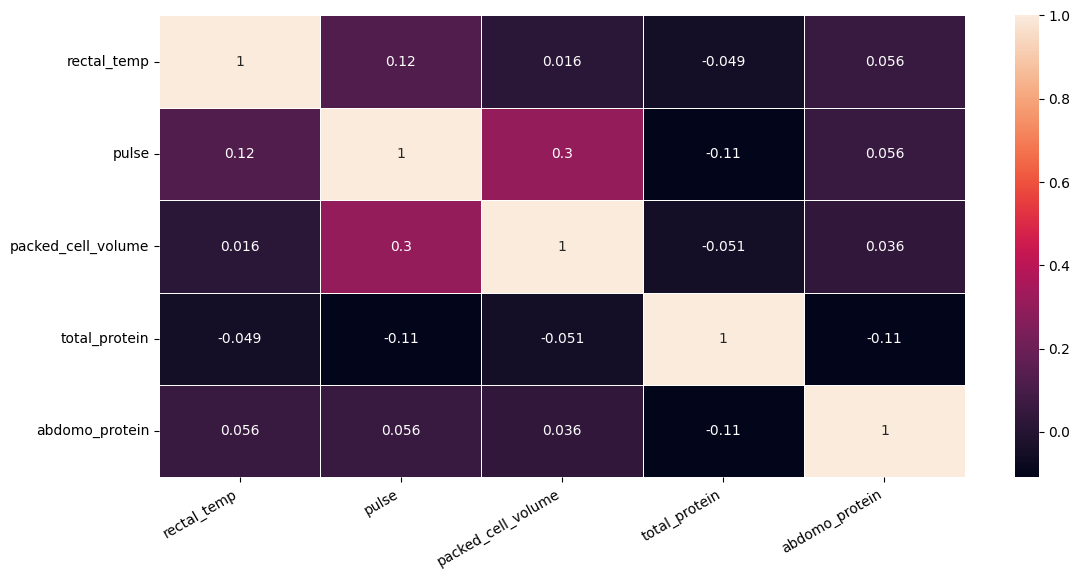

In [12]:
plt.figure(figsize=(13, 6))
sns.heatmap(corrmat, vmax=1, annot=True, linewidths=.5)
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

Przedstawienie liczby zwierząt w różnych podgrupach dla określonych kolumn.

In [13]:
horseNotNaN['temp_of_extremities'].value_counts()

cool      133
normal     92
warm       37
cold       34
Name: temp_of_extremities, dtype: int64

In [14]:
horseNotNaN['pain'].value_counts()

mild_pain       77
depressed       73
severe_pain     50
extreme_pain    49
alert           47
Name: pain, dtype: int64

In [15]:
horseNotNaN.loc[:,'outcome'].tolist().count('euthanized')

43

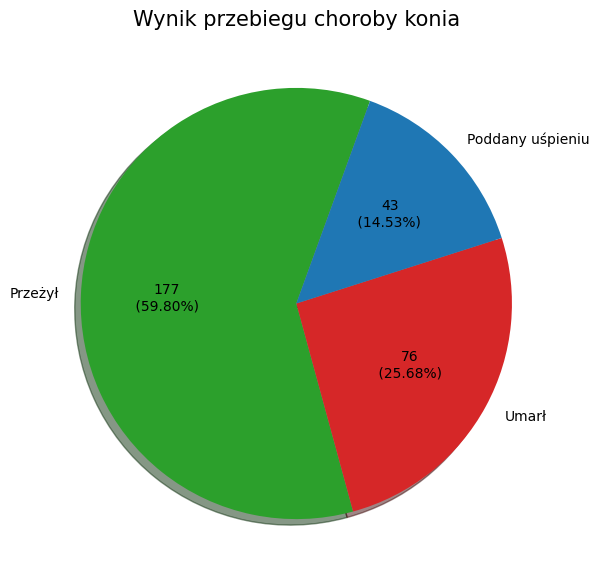

In [16]:
plt.figure(figsize=(12, 7))
values=[horseNotNaN.loc[:,'outcome'].tolist().count('lived'),horseNotNaN.loc[:,'outcome'].tolist().count('died'),horseNotNaN.loc[:,'outcome'].tolist().count('euthanized')]
mylabel=["Przeżył","Umarł","Poddany uśpieniu"]
colors = ['tab:green', 'tab:red','tab:blue']

plt.pie(values,labels=mylabel,colors = colors,autopct=lambda p: '{:.0f}\n ({:.2f}%) '.format(p * sum(values)/100, p),shadow=True, startangle=70)
    
plt.title('Wynik przebiegu choroby konia', ha='center', fontsize=15)

plt.show()

Liczba koni podzielona ze względu na poziom bólu oraz informację na temat restrospektywnej przyczyny choroby.

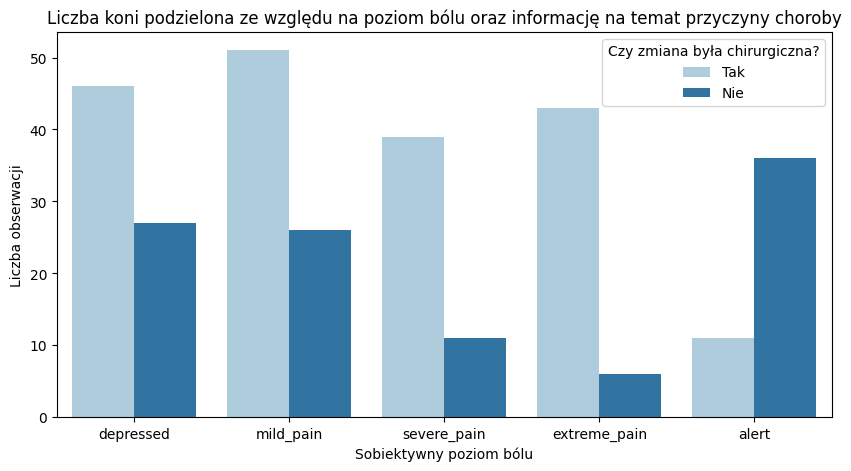

In [17]:
fig, axes = plt.subplots(figsize=(10,5))
g = sns.countplot(x='pain', data=horseNotNaN, hue='surgical_lesion', palette='Paired')
g.set_title('Liczba koni podzielona ze względu na poziom bólu oraz informację na temat przyczyny choroby')
g.set_xlabel('Sobiektywny poziom bólu')
g.set_ylabel('Liczba obserwacji')
mylabel=["Tak","Nie"]
g.legend(title='Czy zmiana była chirurgiczna?',loc='upper right',labels=mylabel)

plt.show()

Rozkład temperatury w zależności od koloru błony śluzowej.

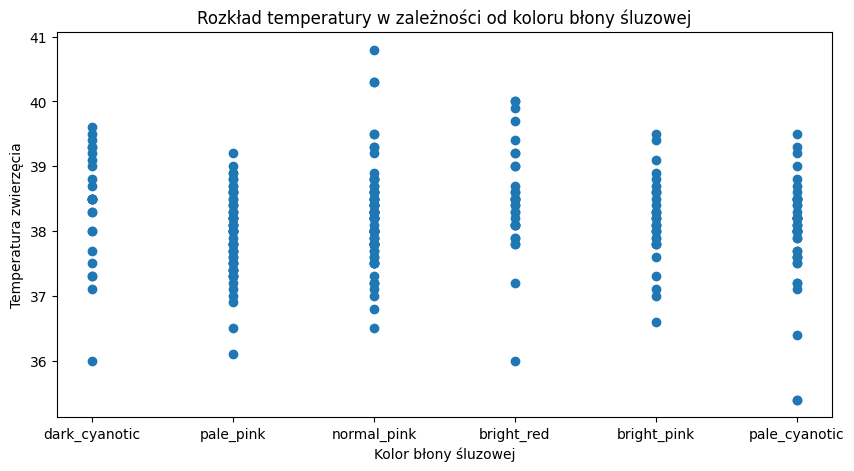

In [18]:
plt.figure(figsize=(10, 5))
plt.scatter(horseNotNaN['mucous_membrane'], horseNotNaN['rectal_temp'])
plt.title('Rozkład temperatury w zależności od koloru błony śluzowej')
plt.xlabel('Kolor błony śluzowej')
plt.ylabel('Temperatura zwierzęcia')
plt.show()

In [ ]:
# <!-- import itertools

# smoking=strokes.loc[:,'smoking_status'].unique().tolist()
# work=strokes.loc[:,'work_type'].unique().tolist()
# residence=strokes.loc[:,'Residence_type'].unique().tolist()
# mylabel=[smoking, work,residence]
# mylabel = itertools.chain(*mylabel)

# mylabel=list(mylabel)

# values=[]
# sickValues=[]
# for value in smoking:
#     values.append(strokes.loc[:,'smoking_status'].tolist().count(value))
#     sickValues.append(strokes.loc[strokes['smoking_status']==value,'heart_disease'].tolist().count(1))
# for value in work:
#     values.append(strokes.loc[:,'work_type'].tolist().count(value))
#     sickValues.append(strokes.loc[strokes['work_type']==value,'heart_disease'].tolist().count(1))
# for value in residence:
#     values.append(strokes.loc[:,'Residence_type'].tolist().count(value))
#     sickValues.append(strokes.loc[strokes['Residence_type']==value,'heart_disease'].tolist().count(1))
    
# print(mylabel,values,sickValues)

# width = 0.5
   
# fig, ax = plt.subplots(figsize=(15, 10)) 
   
# ax.barh(mylabel, values, width,  
#         label ='Zdrowi',color='tab:cyan') 
   
# ax.barh(mylabel, sickValues, width,  
#         left = 0,  
#         label ='Chorzy', color='tab:red') 
 
# ax.set_xlabel('Liczebność poszczególnych grup') 
# plt.xticks(np.arange(0, 3000, step=100))
# ax.legend() 
   
# ax.set_title('Zestawienie osób, u których wykryto choroby serca z całą liczebnością poszczególnych grup') 
   
# plt.show()  -->